# CHƯƠNG 2: QUY TRÌNH XÂY DỰNG MỘT HỆ THỐNG HỌC MÁY - PHẦN 2
----

* Mã sinh viên: 1821050295
* Họ và tên: Đỗ Thị Huyền
* Lớp: DCCTPM63A
* Email: huyenjy@gmail.com
---


# THỰC HÀNH 4
---
**Mô tả tập dữ liệu:**

Tập dữ liệu Data_practice4 chứa dữ liệu của 961 bệnh nhân bị u vú.

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 6 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số [18-96 tuổi]
3. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
4. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
5. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
6. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)

**Yêu cầu 4.1:**
Đọc tập dữ liệu Data_Practice4.csv vào biến DataFrame, hiển thị thông tin của biến, 5 bản ghi đầu tiên và thống kê dữ liệu.


In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}

#Gọi các thư viện sử dụng cho Project:

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 4.1) Tải tập dữ liệu:
---

In [ ]:
path_practice ="Data/Data_Practice4.csv"
df_practice = pd.read_csv(path_practice)
df_practice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Age        956 non-null    float64
 2   Shape      930 non-null    object 
 3   Margin     913 non-null    object 
 4   Density    885 non-null    object 
 5   Target     961 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.2+ KB


### Hiển thị danh sách 5 bản ghi đầu tiên

In [ ]:
df_practice.head(5)

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1


### Thống kê dữ liệu

In [ ]:
df_practice.describe()

,Age,Target
count,956.000000,961.000000
mean,55.487448,0.463059
std,14.480131,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,96.000000,1.000000


In [ ]:
#Thông kê tập dữ liệu Train các thuộc tính có dtype: Object
df_practice.describe(include=['O'])

,PatientID,Shape,Margin,Density
count,961,930,913,885
unique,961,4,5,4
top,P1,Irregular,Circumscribed,Low
freq,1,400,357,798


**Yêu cầu 4.2:**
Thông kê dữ liệu missing cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó.

### 4.2) Thông kê dữ liệu missing cho từng thuộc tính:
---

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}

#Xây dựng hàm thống kê dữ liệu missing trong dataframe:
#-----------------------------------------------------
#Đầu vào của hàm là 1 biến Dataframe
#Đầu ra bao gồm các thông số:
#Tổng số cột của file dữ liệu
#Tổng số cột có chứa dữ liệu missing
#Danh sách các cột chứa dữ liệu missing với 2 thống số:
#Tổng số giá trị missing tương ứng với cột đó
#Tỷ lệ % dữ liệu missing trên tổng số dữ liệu của cột
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

In [ ]:
print('Số lượng missing data trong tập Train: \n')
missing_values(df_practice)

Số lượng missing data trong tập Train: 

File dữ liệu bao gồm có: 6 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


### Liệt kê ra các bản ghi bị missing tương ứng với thuộc tính
---
**Thuộc tính Density**

In [ ]:
df_practice[df_practice['Density'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
1,P2,43.0,Round,Circumscribed,NaN,1
4,P5,74.0,Round,Spiculated,NaN,1
19,P20,40.0,Round,NaN,NaN,0
22,P23,43.0,Round,NaN,NaN,0
26,P27,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...,...
614,P615,46.0,NaN,Spiculated,NaN,1
627,P628,57.0,Oval,Circumscribed,NaN,0
665,P666,27.0,Oval,Circumscribed,NaN,0
677,P678,57.0,Irregular,ill-defined,NaN,1


**Thuộc tính Margin**

In [ ]:
df_practice[df_practice['Margin'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
5,P6,65.0,Round,NaN,Low,0
6,P7,70.0,NaN,NaN,Low,0
7,P8,42.0,Round,NaN,Low,0
12,P13,64.0,Round,NaN,Low,0
19,P20,40.0,Round,NaN,NaN,0
20,P21,66.0,NaN,NaN,High,1
22,P23,43.0,Round,NaN,NaN,0
27,P28,63.0,Lobular,NaN,Low,0
35,P36,77.0,Lobular,NaN,NaN,0
48,P49,42.0,NaN,NaN,Fat-containing,0


**Thuộc tính Shape**

In [ ]:
df_practice[df_practice['Shape'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
6,P7,70.0,NaN,NaN,Low,0
9,P10,60.0,NaN,Spiculated,High,1
20,P21,66.0,NaN,NaN,High,1
48,P49,42.0,NaN,NaN,Fat-containing,0
54,P55,53.0,NaN,Spiculated,Low,1
74,P75,70.0,NaN,ill-defined,NaN,1
83,P84,57.0,NaN,ill-defined,High,0
128,P129,52.0,NaN,ill-defined,NaN,0
157,P158,51.0,NaN,NaN,Low,0
163,P164,53.0,NaN,ill-defined,Low,0


**Thuộc tính Age**

In [ ]:
df_practice[df_practice['Age'].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
443,P444,NaN,Irregular,Spiculated,Low,1
453,P454,NaN,Irregular,ill-defined,Low,1
683,P684,NaN,Lobular,Obscured,Low,1
884,P885,NaN,Irregular,ill-defined,Low,1
923,P924,NaN,Irregular,Obscured,Low,1


**Yêu cầu 4.3:** Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target] 

## 4.3) Phân tích các thuộc tính độc lập ảnh hưởng đến khả năng khối u là lành tính (0) hay ác tính (1) của bệnh nhân:
---
Mỗi một bản ghi bao gồm 6 thuộc tính (tương ứng với 6 cột dữ liệu)

**a) Thuộc tính Tuổi - Age:**
---

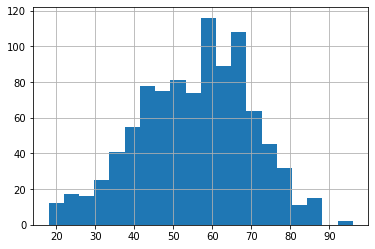

In [ ]:
plt.hist(df_practice.Age,bins=20)
plt.grid(True)
plt.show()

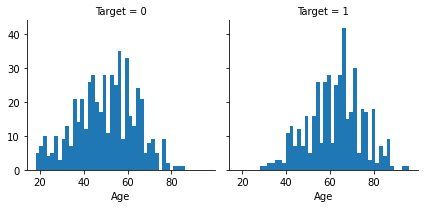

In [ ]:
#Thống kê liệu tuổi bệnh nhân có u lành/ác tính
g = sns.FacetGrid(df_practice, col='Target')
g.map(plt.hist, 'Age', bins=40)

Quan sát dữ liệu Tuổi:
*  Hầu hết hành khách đi tàu nằm trong độ tuổi từ 40 - 70
*  Thanh niên (Tuổi <30) có tỷ lệ u lành tính cao
*  Các hành khách già (Tuổi > 80) tỷ lệ u ác tính cao
*  Một lượng lớn hành khách trong độ tuổi từ 50 - 80 mắc u ác tính

Xem xét:

*  Thuộc tính Age ảnh hưởng tới khả năng khối u là lành tính hay ác tính của bệnh nhân --> đưa vào mô hình huấn luyện
*  Xử lý một số dữ liệu missing của thuộc tính age
*  Nhóm các độ tuổi theo từng group

**b) Thuộc tính Hình dạng - Shape:**
---
Shape: Hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular

In [ ]:
df_practice[["Shape", "Target"]].groupby(['Shape'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


**Shape: Ảnh hưởng cao tới khả năng khối u là lành tính hay ác tính của bệnh nhân. Hình dạng khối u là Irregular có tỷ lệ u ác tính là 78,75% trong khi hình dạng khối u là Round, Oval chỉ có tỷ lệ cao là u lành tính**

**c) Thuộc tính Dạng đường biên - Margin:**
---
Margin: Dạng đường biên của khối u | Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated

In [ ]:
df_practice[["Margin", "Target"]].groupby(['Margin'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


**Margin: Có ảnh hưởng tới khả năng khối u là lành tính hay ác tính của bệnh nhân. Những khối u có dạng đường biên là Circumscribed có tỷ lệ là u lành tính cao hơn những dạng đường biên khác**

**d) Thuộc tính Mật độ - Density:**
---
Density: Mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing

In [ ]:
df_practice[["Density", "Target"]].groupby(['Density'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Density,Target
3,Low,0.492481
1,High,0.437500
0,Fat-containing,0.416667
2,Iso,0.305085


**Density: Có ảnh hưởng tới khả năng khối u là lành tính hay ác tính của bệnh nhân. Những khối u có mật độ là Iso có tỷ lệ là u lành tính cao hơn những mật độ khác**

**Yêu cầu 4.4:** Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy và lưu kết quả dữ liệu sau xử lý ra file Data_Practice4_ok.csv 


## 4.4) Tiền xử lý dữ liệu
---

#### a) Loại bỏ các thuộc tính không quan trọng
---
* Một số thuộc tính không|ít ảnh hưởng tới khả năng khối u là lành tính hay ác tính của bệnh nhân, cần loại bỏ những thuộc tính này khỏi dữ liệu. Để giảm chiều dữ liệu và nâng cao chất lượng của dữ liệu huấn luyện.

* Có 1 thuộc tính không ảnh hưởng|ít ảnh hưởng là:

    1. **PatientID:** Thuộc tính cho biết mã số của bệnh nhân (Bỏ)

In [ ]:
#Tạo một DataFrame mới df_data loại bỏ đi 5 thuộc tính ko quan trọng
df_data = df_practice.drop(['PatientID'], axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      956 non-null    float64
 1   Shape    930 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


In [ ]:
df_data.head()

,Age,Shape,Margin,Density,Target
0,67.0,Lobular,Spiculated,Low,1
1,43.0,Round,Circumscribed,NaN,1
2,58.0,Irregular,Spiculated,Low,1
3,28.0,Round,Circumscribed,Low,0
4,74.0,Round,Spiculated,NaN,1


#### b) Xử lý các thuộc tính missing value:
---
* Các mô hình học máy không làm việc được với các bản ghi chứa thuộc tính missing do đó cần phải được xử lý.

* Trong tập dữ liệu hiện tại có thuộc tính chứa giá trị missing, bao gồm:

    1. **Age:** Missing 5 bản ghi (chiếm 0.52%)
    2. **Shape:** Missing 31 bản ghi (chiếm 3.23%)
    3. **Margin:** Missing 48 bản ghi (chiếm 4.99%)
    4. **Density:** Missing 76 bản ghi (chiếm 7.91%)

In [ ]:
missing_values(df_data)

File dữ liệu bao gồm có: 5 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


#####  b1) Xử lý dữ liệu mất mát của thuộc tính Density
---
Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing

Trong thuộc tính Density có 76 giá trị missing, để xử lý các giá trị missing này ta thực hiện bằng cách, lấy giá trị xuất hiện nhiều nhất của thuộc tính Density để thay thế cho giá trị missing.

Tổng 961 hành khách, có 798 hành khách có giá trị thuộc tính là `Low`, 76 hành khách missing.

In [ ]:
#Danh sách bản ghi missing thộc tính Density trong tập dữ liệu
df_data[df_data['Density'].isnull()]

,Age,Shape,Margin,Density,Target
1,43.0,Round,Circumscribed,NaN,1
4,74.0,Round,Spiculated,NaN,1
19,40.0,Round,NaN,NaN,0
22,43.0,Round,NaN,NaN,0
26,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...
614,46.0,NaN,Spiculated,NaN,1
627,57.0,Oval,Circumscribed,NaN,0
665,27.0,Oval,Circumscribed,NaN,0
677,57.0,Irregular,ill-defined,NaN,1


In [ ]:
#Thống kê số lượng bản ghi theo mật độ:
df_data['Density'].value_counts()

Low               798
Iso                59
High               16
Fat-containing     12
Name: Density, dtype: int64

In [ ]:
798/(961-76)

0.9016949152542373

Trong các giá trị thì `Low` xuất hiện 798 lần (Xuất hiện nhiều nhất) chiếm ~90,2%  
==> Xử lý thuộc tính Embarked bằng giá trị xuất hiện nhiều nhất trong dữ liệu đó là cảng S

In [ ]:
df_data['Density'] = df_data['Density'].fillna('Low')

In [ ]:
#Thống kê dữ liệu sau khi xử lý missing thuộc tính Density
df_data.isnull().sum()

Age         5
Shape      31
Margin     48
Density     0
Target      0
dtype: int64

#####  b2) Xử lý dữ liệu mất mát của thuộc tính Margin
---
Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated

Trong thuộc tính Density có 76 giá trị missing, để xử lý các giá trị missing này ta thực hiện bằng cách, lấy giá trị xuất hiện nhiều nhất của thuộc tính Density để thay thế cho giá trị missing.

Tổng 961 hành khách, có 798 hành khách có giá trị thuộc tính là Low, 76 hành khách missing.

In [ ]:
#Danh sách bản ghi missing thuộc tính Margin trong tập dữ liệu
df_data[df_data['Margin'].isnull()]

,Age,Shape,Margin,Density,Target
5,65.0,Round,NaN,Low,0
6,70.0,NaN,NaN,Low,0
7,42.0,Round,NaN,Low,0
12,64.0,Round,NaN,Low,0
19,40.0,Round,NaN,Low,0
20,66.0,NaN,NaN,High,1
22,43.0,Round,NaN,Low,0
27,63.0,Lobular,NaN,Low,0
35,77.0,Lobular,NaN,Low,0
48,42.0,NaN,NaN,Fat-containing,0


In [ ]:
# Thuộc tính Margin ảnh hưởng đến khả năng khối u là lành tính (0) hay ác tính (1) của bệnh nhân
df_data[["Margin", "Target"]].groupby(['Margin'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


##### Những khối u có dạng đường biên là Circumscribed có tỷ lệ cao là u lành tính cao và dạng đường biên Spiculated có tỷ lệ cao là u ác tính
---
==> Xử lý missing thuộc tính Margin:
* Thay bằng giá trị Circumscribed nếu Target = 0
* Thay bằng giá trị Spiculated nếu Target = 1

In [ ]:
df_data.loc[(df_data['Margin'].isnull()) & (df_data['Target'] == 0), 'Margin'] = 'Circumscribed'
df_data.loc[(df_data['Margin'].isnull()) & (df_data['Target'] == 1), 'Margin'] = 'Spiculated'

In [ ]:
#Thống kê dữ liệu sau khi xử lý missing thuộc tính Margin
df_data.isnull().sum()

Age         5
Shape      31
Margin      0
Density     0
Target      0
dtype: int64

#####  b3) Xử lý dữ liệu mất mát của thuộc tính Shape
---

In [ ]:
#Danh sách bản ghi missing thuộc tính Shape trong tập dữ liệu
df_data[df_data['Shape'].isnull()]

,Age,Shape,Margin,Density,Target
6,70.0,NaN,Circumscribed,Low,0
9,60.0,NaN,Spiculated,High,1
20,66.0,NaN,Spiculated,High,1
48,42.0,NaN,Circumscribed,Fat-containing,0
54,53.0,NaN,Spiculated,Low,1
74,70.0,NaN,ill-defined,Low,1
83,57.0,NaN,ill-defined,High,0
128,52.0,NaN,ill-defined,Low,0
157,51.0,NaN,Circumscribed,Low,0
163,53.0,NaN,ill-defined,Low,0


In [ ]:
# Thuộc tính Shape ảnh hưởng đến khả năng khối u là lành tính (0) hay ác tính (1) của bệnh nhân
df_data[["Shape", "Target"]].groupby(['Shape'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


Những khối u có hình dạng là Oval có tỷ lệ cao là u lành tính cao và dạng Irregular có tỷ lệ cao là u ác tính
==> Xử lý missing thuộc tính Shape:

Thay bằng giá trị Oval nếu Target = 0
Thay bằng giá trị Irregular nếu Target = 1

In [ ]:
df_data.loc[(df_data['Shape'].isnull()) & (df_data['Target'] == 0), 'Shape'] = 'Oval'
df_data.loc[(df_data['Shape'].isnull()) & (df_data['Target'] == 1), 'Shape'] = 'Irregular'

In [ ]:
#Thống kê dữ liệu sau khi xử lý missing thuộc tính Shape
df_data.isnull().sum()

Age        5
Shape      0
Margin     0
Density    0
Target     0
dtype: int64

#####  b4) Xử lý dữ liệu mất mát của thuộc tính Age
---
Tập dữ liệu có 5 bản ghi bị missing thông tin về tuổi chiếm tỷ lệ (0.52%)


In [ ]:
#Danh sách bản ghi missing thuộc tính Age trong tập dữ liệu
df_data[df_data['Age'].isnull()]

,Age,Shape,Margin,Density,Target
443,NaN,Irregular,Spiculated,Low,1
453,NaN,Irregular,ill-defined,Low,1
683,NaN,Lobular,Obscured,Low,1
884,NaN,Irregular,ill-defined,Low,1
923,NaN,Irregular,Obscured,Low,1


**Bởi vì thuộc tính Age chỉ có 5 bản ghi bị missing, chiếm 0.52%, không ảnh nhiều tới kết quá => drop**

In [ ]:
df_data.dropna(inplace=True)

In [ ]:
df_data.isnull().sum()

Age        0
Shape      0
Margin     0
Density    0
Target     0
dtype: int64

**DỮ LIỆU SAU KHI XỬ LÝ MISSING:**

In [ ]:
missing_values(df_data)

File dữ liệu bao gồm có: 5 cột.
Có 0 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing


#### c)  Rời rạc hóa dữ liệu

In [ ]:
#Tính tỷ lệ được cứu của hành khách theo từng khoảng tuổi:
n=5
df_temp = df_data.copy()
df_temp['AgeBand'] = pd.cut(df_temp['Age'], n)

df_temp[['AgeBand', 'Target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Target
0,"(17.922, 33.6]",0.057143
1,"(33.6, 49.2]",0.269076
2,"(49.2, 64.8]",0.452778
3,"(64.8, 80.4]",0.726908
4,"(80.4, 96.0]",0.892857


**Ta thấy rằng, tỷ lệ được cứu của hành khách có quan hệ theo độ tuổi, người già và trẻ em có tỷ lệ được cứu cao. Thực hiện chia dữ liệu độ tuổi theo từng đoạn**

* Dưới 34 tuổi     :   có tỷ lệ u lành tính cao nhất (94.3%)
* Từ 34 --> 49 tuổi:   có tỷ lệ u lành tính cao thứ nhì (73.1%)
* Từ 49 --> 65 tuổi:   có tỷ lệ u lành tính cao thứ ba (54.7%)
* Từ 65 --> 80 tuổi:   có tỷ lệ u ác tính cao thứ hai (72.7%)
* Trên 80 tuổi     :   có tỷ lệ u ác tính cao nhất (89.3%)

In [ ]:
df_temp

,Age,Shape,Margin,Density,Target,AgeBand
0,67.0,Lobular,Spiculated,Low,1,"(64.8, 80.4]"
1,43.0,Round,Circumscribed,Low,1,"(33.6, 49.2]"
2,58.0,Irregular,Spiculated,Low,1,"(49.2, 64.8]"
3,28.0,Round,Circumscribed,Low,0,"(17.922, 33.6]"
4,74.0,Round,Spiculated,Low,1,"(64.8, 80.4]"
...,...,...,...,...,...,...
956,47.0,Oval,Circumscribed,Low,0,"(33.6, 49.2]"
957,56.0,Irregular,Spiculated,Low,1,"(49.2, 64.8]"
958,64.0,Irregular,Spiculated,Low,0,"(49.2, 64.8]"
959,66.0,Irregular,Spiculated,Low,1,"(64.8, 80.4]"


**Thay thế tuổi tuyệt đối của hành khách bằng khoảng mà tuổi thuộc vào:**
* Dưới 34 tuổi        :   --> Age = 0
* Từ 34 --> 49 tuổi:   --> Age = 1
* Từ 49 --> 65 tuổi:   --> Age = 2
* Từ 65 --> 80 tuổi:   --> Age = 3
* Trên 80 tuổi        :   --> Age = 4

In [ ]:
df_data.loc[ df_data['Age'] <= 34, 'Age'] = 0
df_data.loc[(df_data['Age'] > 34) & (df_data['Age'] <= 49), 'Age'] = 1
df_data.loc[(df_data['Age'] > 49) & (df_data['Age'] <= 65), 'Age'] = 2
df_data.loc[(df_data['Age'] > 65) & (df_data['Age'] <= 80), 'Age'] = 3
df_data.loc[ df_data['Age'] > 80, 'Age'] = 4

In [ ]:
df_data

,Age,Shape,Margin,Density,Target
0,3.0,Lobular,Spiculated,Low,1
1,1.0,Round,Circumscribed,Low,1
2,2.0,Irregular,Spiculated,Low,1
3,0.0,Round,Circumscribed,Low,0
4,3.0,Round,Spiculated,Low,1
...,...,...,...,...,...
956,1.0,Oval,Circumscribed,Low,0
957,2.0,Irregular,Spiculated,Low,1
958,2.0,Irregular,Spiculated,Low,0
959,3.0,Irregular,Spiculated,Low,1


In [ ]:
#Ép Age sang kiểu dữ liệu số nguyên
df_data['Age'] = df_data['Age'].astype(int)
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,Lobular,Spiculated,Low,1
1,1,Round,Circumscribed,Low,1
2,2,Irregular,Spiculated,Low,1
3,0,Round,Circumscribed,Low,0
4,3,Round,Spiculated,Low,1


#### d)   Chuyển đổi dữ liệu thuộc tính sang dạng số
----
Một số thuộc tính của tập dữ liệu không phải dữ liệu số, trong bước này sẽ thực hiện chuyển đổi các dữ liệu Catagorical về dạng số để cho vào mô hình học máy.

Các thuộc tính cần chuyển đổi bao gồm:
* Shape 
* Margin
* Density

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Age      956 non-null    int32 
 1   Shape    956 non-null    object
 2   Margin   956 non-null    object
 3   Density  956 non-null    object
 4   Target   956 non-null    int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 41.1+ KB


In [ ]:
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,Lobular,Spiculated,Low,1
1,1,Round,Circumscribed,Low,1
2,2,Irregular,Spiculated,Low,1
3,0,Round,Circumscribed,Low,0
4,3,Round,Spiculated,Low,1


In [ ]:
#Chuyển đổi thuộc tính Shape về dạng số nguyên (int)
# trong đó: Round = 0, Oval = 1, Lobular = 2, Irregular = 3

df_data['Shape'] = df_data['Shape'].map( {'Round': 0, 'Oval': 1, 'Lobular': 2, 'Irregular': 3} ).astype(int)

#Hiển thị dữ liệu 5 mẫu đầu tiên trong tập dữ liệu Train sau khi đã chuyển đổi.
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,2,Spiculated,Low,1
1,1,0,Circumscribed,Low,1
2,2,3,Spiculated,Low,1
3,0,0,Circumscribed,Low,0
4,3,0,Spiculated,Low,1


In [ ]:
#Chuyển đổi thuộc tính Margin về dạng số nguyên (int)
# trong đó:  Circumscribed = 0, Microlobulated = 1, Obscured = 2, ill-defined = 3, Spiculated = 4

df_data['Margin'] = df_data['Margin'].map( {'Circumscribed': 0, 
                                            'Microlobulated': 1, 
                                            'Obscured': 2, 
                                            'ill-defined': 3,
                                            'Spiculated': 4} ).astype(int)

#Hiển thị dữ liệu 5 mẫu đầu tiên trong tập dữ liệu Train sau khi đã chuyển đổi.
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,2,4,Low,1
1,1,0,0,Low,1
2,2,3,4,Low,1
3,0,0,0,Low,0
4,3,0,4,Low,1


In [ ]:
#Chuyển đổi thuộc tính Density về dạng số nguyên (int)
# trong đó: High = 0, Iso = 1, Low = 2, Fat-containing = 3

df_data['Density'] = df_data['Density'].map( {'High': 0, 'Iso': 1, 'Low': 2, 'Fat-containing': 3} ).astype(int)

#Hiển thị dữ liệu 5 mẫu đầu tiên trong tập dữ liệu Train sau khi đã chuyển đổi.
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,2,4,2,1
1,1,0,0,2,1
2,2,3,4,2,1
3,0,0,0,2,0
4,3,0,4,2,1


## Lưu dữ liệu sau khi đã xử lý ra file .csv
---
Lưu dữ liệu sau khi đã chuẩn hóa ra file: Data_Practice4_ok.csv

In [ ]:
df_data.to_csv('Data_Practice4_ok.csv',index=None)

## Phân tách biến độc lập - phụ thuộc
---
* Biến độc lập X:'Age', 'Shape', 'Margin', 'Density'
* Biến phụ thuộc y: Target

In [ ]:
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,2,4,2,1
1,1,0,0,2,1
2,2,3,4,2,1
3,0,0,0,2,0
4,3,0,4,2,1


In [ ]:
#Tách biến độc lập X
X_practice = df_data.iloc[:,:-1].values
X_practice

array([[3, 2, 4, 2],
       [1, 0, 0, 2],
       [2, 3, 4, 2],
       ...,
       [2, 3, 4, 2],
       [3, 3, 4, 2],
       [2, 2, 2, 2]])

In [ ]:
X_practice.shape

(956, 4)

In [ ]:
#Tách biến phụ thuộc y
y_practice = df_data.iloc[:,-1].values
y_practice

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
y_practice.shape

(956,)

## Phân tách tập dữ liệu Train - Test (75%-25%)
----
* Tập train (75%) huấn luyện model
* Tập test (25%) đánh giá độ chính xác của model

In [ ]:
from sklearn.model_selection import train_test_split
X_practice_train, X_practice_test, y_practice_train, y_practice_test = train_test_split(X_practice,
                                                                                   y_practice,
                                                                                   test_size=0.25,
                                                                                   random_state=42)

In [ ]:
print('1. Kích thước tập Train: ', X_practice_train.shape)
print('2. Kích thước tập Test: ', X_practice_test.shape)

1. Kích thước tập Train:  (717, 4)
2. Kích thước tập Test:  (239, 4)


In [ ]:
X_practice_train

array([[2, 3, 3, 2],
       [1, 2, 3, 2],
       [1, 0, 0, 2],
       ...,
       [3, 3, 1, 1],
       [3, 3, 4, 2],
       [2, 3, 3, 2]])

In [ ]:
X_practice_test

array([[1, 0, 3, 2],
       [1, 0, 0, 2],
       [2, 0, 0, 2],
       [2, 1, 0, 2],
       [1, 3, 0, 0],
       [2, 3, 3, 2],
       [1, 1, 0, 2],
       [2, 2, 4, 2],
       [2, 3, 3, 2],
       [1, 0, 0, 2],
       [0, 0, 0, 2],
       [3, 3, 2, 2],
       [0, 1, 0, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 2],
       [3, 2, 0, 2],
       [1, 0, 4, 1],
       [2, 3, 4, 2],
       [2, 3, 3, 1],
       [2, 3, 3, 2],
       [2, 3, 2, 2],
       [2, 3, 3, 2],
       [4, 2, 3, 2],
       [4, 3, 4, 2],
       [2, 2, 0, 2],
       [1, 3, 3, 2],
       [2, 3, 2, 2],
       [3, 2, 4, 2],
       [4, 3, 4, 2],
       [3, 1, 0, 1],
       [3, 3, 4, 2],
       [0, 1, 0, 2],
       [2, 0, 4, 2],
       [1, 2, 3, 2],
       [1, 3, 4, 2],
       [2, 2, 3, 2],
       [4, 3, 4, 2],
       [2, 1, 4, 2],
       [1, 1, 0, 2],
       [0, 1, 0, 2],
       [1, 1, 1, 2],
       [2, 2, 3, 1],
       [0, 0, 0, 2],
       [2, 1, 0, 2],
       [4, 3, 2, 2],
       [2, 1, 3, 2],
       [1, 0, 0, 2],
       [3, 3,

# THỰC HÀNH 5
---
<img src = 'Pic/mushrooms.jpg' align='left' width='200px' >

Tập dữ liệu mushrooms.csv chứa dữ liệu của trên 8124 cây nấm, bao gồm 2 loại là nấm ăn được (e) và nấm độc (p) . Lưu ý: các ký tự ? là các dữ liệu thiếu)

**Yêu cầu:**
1. Nghiên cứu để hiểu tập dữ liệu Mushrooms.csv
2. Đề xuất, áp dụng các kỹ thuật chuẩn hóa, tiền xử lý dữ liệu phù hợp để có thể đưa vào các mô hình học máy
3. Lưu kết quả dữ liệu sau xử lý ra file Mushrooms_ok.csv

**Mô tả tập dữ liệu:**

Tập dữ liệu Mushrooms chứa dữ liệu của 8124 cây nấm

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 23 thuộc tính:
1. class: Thuộc tính cho biết cây nấm ăn được (e) hay có độc (p)
2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s - hình dạng nắp
3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s - bề mặt nắp
4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y - màu nắp
5. bruises: bruises=t,no=f - vết thâm
6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s - mùi
7. gill-attachment: attached=a,descending=d,free=f,notched=n - Mang đính kèm
8. gill-spacing: close=c,crowded=w,distant=d - Khoảng cách mang
9. gill-size: broad=b,narrow=n - Kích thước mang
10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y - Màu mang
11. stalk-shape: enlarging=e,tapering=t - Hình dạng cuống
12. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? - Cuống rễ
13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s - Cuống bề mặt trên vòng
14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s - Cuống bề mặt dưới vòng
15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y - Cuống màu trên vòng
16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y  Cuống màu dưới vòng
17. veil-type: partial=p,universal=u - Kiểu màn che
18. veil-color: brown=n,orange=o,white=w,yellow=y - Màu màn che
19. ring-number: none=n,one=o,two=t - Số vòng
20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z - Kiểu vòng
21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
22. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y - Quần thể nấm
23. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d - Môi trường sống
---
### 5.1) Tải tập dữ liệu:
---

In [ ]:
import pandas as pd
df_mushrooms = pd.read_csv('Data/mushrooms.csv',
                           na_values='?')
#df_mushrooms = pd.read_csv(path_mushrooms)
#import numpy as np
#df_mushrooms.replace({'?': np.nan}, regex=False,inplace=True)
df_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#Hiển thị danh sách thông tin 10 bản ghi đầu tiên
df_mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [ ]:
#Hiển thị dữ liệu 10 bản ghi cuối cùng
df_mushrooms.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


### 5.2) Phân tích - Thống kê số liệu 
---

In [ ]:
df_mushrooms.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
print('Số lượng missing data trong tập Train: \n')
missing_values(df_mushrooms)

Số lượng missing data trong tập Train: 

File dữ liệu bao gồm có: 23 cột.
Có 1 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
stalk-root,2480,30.53


In [ ]:
#Phân tích số liệu tập Train
df_mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#Thông kê tập dữ liệu Train các thuộc tính có dtype: Object
df_mushrooms.describe(include=['O'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 5.3) Tiền xử lý dữ liệu
---
### 5.3.1) Loại bỏ các thuộc tính không quan trọng
---
* Một số thuộc tính không|ít ảnh hưởng tới việc hành khách được cứu hay không, cần loại bỏ những thuộc tính này khỏi dữ liệu. Để giảm chiều dữ liệu và nâng cao chất lượng của dữ liệu huấn luyện.

In [ ]:
# Xem xét số phần tử riêng biệt tại mỗi cột
df_mushrooms.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

veil-type  chỉ có một loại giá trị => bỏ

In [ ]:
#Loại bỏ đi thuộc tính ko quan trọng
df_mushrooms = df_mushrooms.drop(['veil-type'], axis=1)
df_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 5.3.2) Xử lý các thuộc tính missing value:
---
* Các mô hình học máy không làm việc được với các bản ghi chứa thuộc tính missing do đó cần phải được xử lý.

In [ ]:
df_mushrooms.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
df_mushrooms = df_mushrooms.drop(['stalk-root'], axis=1)

**DỮ LIỆU SAU KHI XỬ LÝ MISSING:**

In [ ]:
missing_values(df_mushrooms)

File dữ liệu bao gồm có: 21 cột.
Có 0 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing


In [ ]:
df_mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## 5.4) Chuyển đổi dữ liệu thuộc tính sang dạng số
----
Một số thuộc tính của tập dữ liệu không phải dữ liệu số, trong bước này sẽ thực hiện chuyển đổi các dữ liệu Catagorical về dạng số để cho vào mô hình học máy.

In [ ]:
df_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [ ]:
#df_mushrooms['class'] = df_mushrooms['class'].map( {'e': 0, 'p': 1} ).astype(int)
#create ordinal values for all categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_mushrooms = df_mushrooms.apply(label_encoder.fit_transform)
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Phân tích các thuộc tính quan trọng ảnh hưởng đến khả năng ăn được/có độc của nấm:
---
Mỗi một bản ghi bao gồm 23 thuộc tính (tương ứng với 23 cột dữ liệu)

1. cap-shape
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['cap-shape', 'class']].groupby(['cap-shape'], as_index=False).mean().sort_values(by='class', ascending=False)

,cap-shape,class
1,1,1.000000
3,3,0.724638
2,2,0.493655
5,5,0.467177
0,0,0.106195
4,4,0.000000


2. cap-surface
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['cap-surface', 'class']].groupby(['cap-surface'], as_index=False).mean().sort_values(by='class', ascending=False)

,cap-surface,class
1,1,1.000000
2,2,0.552426
3,3,0.536375
0,0,0.327586


3. cap-color
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['cap-color', 'class']].groupby(['cap-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,cap-color,class
0,0,0.714286
9,9,0.626866
5,5,0.611111
2,2,0.584000
4,4,0.446585
3,3,0.439130
8,8,0.307692
1,1,0.272727
6,6,0.000000
7,7,0.000000


4. bruises
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['bruises', 'class']].groupby(['bruises'], as_index=False).mean().sort_values(by='class', ascending=False)

,bruises,class
0,0,0.693345
1,1,0.184834


5. odor
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['odor', 'class']].groupby(['odor'], as_index=False).mean().sort_values(by='class', ascending=False)

,odor,class
1,1,1.000000
2,2,1.000000
4,4,1.000000
6,6,1.000000
7,7,1.000000
8,8,1.000000
5,5,0.034014
0,0,0.000000
3,3,0.000000


6. gill-attachment
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['gill-attachment', 'class']].groupby(['gill-attachment'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-attachment,class
1,1,0.492545
0,0,0.085714


7. gill-spacing
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['gill-spacing', 'class']].groupby(['gill-spacing'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-spacing,class
0,0,0.558426
1,1,0.085366


8. gill-size
----
Có ảnh hưởng

In [ ]:
df_mushrooms[['gill-size', 'class']].groupby(['gill-size'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-size,class
1,1,0.885350
0,0,0.301497


9. gill-color
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['gill-color', 'class']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


10. stalk-shape
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['stalk-shape', 'class']].groupby(['stalk-shape'], as_index=False).mean().sort_values(by='class', ascending=False)

,stalk-shape,class
0,0,0.540387
1,1,0.437500


12. stalk-surface-above-ring
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['stalk-surface-above-ring', 'class']].groupby(['stalk-surface-above-ring'], as_index=False).mean().sort_values(by='class', ascending=False)

,stalk-surface-above-ring,class
1,1,0.939292
3,3,0.333333
2,2,0.296754
0,0,0.260870


13. stalk-surface-below-ring
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['stalk-surface-below-ring', 'class']].groupby(['stalk-surface-below-ring'], as_index=False).mean().sort_values(by='class', ascending=False)

,stalk-surface-below-ring,class
1,1,0.937500
2,2,0.311183
3,3,0.267606
0,0,0.240000


14. stalk-color-above-ring
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['stalk-color-above-ring', 'class']].groupby(['stalk-color-above-ring'], as_index=False).mean().sort_values(by='class', ascending=False)

,stalk-color-above-ring,class
0,0,1.000000
1,1,1.000000
8,8,1.000000
4,4,0.964286
6,6,0.692308
7,7,0.383513
2,2,0.000000
3,3,0.000000
5,5,0.000000


15. stalk-color-below-ring
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['stalk-color-below-ring', 'class']].groupby(['stalk-color-below-ring'], as_index=False).mean().sort_values(by='class', ascending=False)

,stalk-color-below-ring,class
0,0,1.000000
1,1,1.000000
8,8,1.000000
4,4,0.875000
6,6,0.692308
7,7,0.383212
2,2,0.000000
3,3,0.000000
5,5,0.000000


17. veil-color
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['veil-color', 'class']].groupby(['veil-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,veil-color,class
3,3,1.000000
2,2,0.493185
0,0,0.000000
1,1,0.000000


18. ring-number
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['ring-number', 'class']].groupby(['ring-number'], as_index=False).mean().sort_values(by='class', ascending=False)

,ring-number,class
0,0,1.000000
1,1,0.508547
2,2,0.120000


19. ring-type
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['ring-type', 'class']].groupby(['ring-type'], as_index=False).mean().sort_values(by='class', ascending=False)

,ring-type,class
2,2,1.000000
3,3,1.000000
0,0,0.636888
4,4,0.205645
1,1,0.000000


20. spore-print-color
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['spore-print-color', 'class']].groupby(['spore-print-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,spore-print-color,class
5,5,1.000000
1,1,0.970588
7,7,0.758794
2,2,0.119658
3,3,0.113821
0,0,0.000000
4,4,0.000000
6,6,0.000000
8,8,0.000000


21. population
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['population', 'class']].groupby(['population'], as_index=False).mean().sort_values(by='class', ascending=False)

,population,class
4,4,0.704950
5,5,0.378505
3,3,0.294872
1,1,0.152941
0,0,0.000000
2,2,0.000000


22. habitat
---
Có ảnh hưởng

In [ ]:
df_mushrooms[['habitat', 'class']].groupby(['habitat'], as_index=False).mean().sort_values(by='class', ascending=False)

,habitat,class
4,4,0.881119
5,5,0.739130
2,2,0.711538
0,0,0.402795
1,1,0.344507
3,3,0.123288
6,6,0.000000


## 5.5) Lưu dữ liệu sau khi đã sử lý ra file .csv
---
Lưu dữ liệu sau khi đã chuẩn hóa ra file Mushrooms_ok.csv.csv

In [ ]:
#Ghi ra file .csv: to_csv
df_mushrooms.to_csv('Data/Mushrooms_ok.csv.csv',index=None)

## 5.6) Phân tách biến độc lập - phụ thuộc
---
* Biến độc lập X: 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
* Biến phụ thuộc y: class

In [ ]:
#df_mushrooms.columns
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
#Tách biến độc lập X
X_mushrooms = df_mushrooms.iloc[:,1:].values
X_mushrooms

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [ ]:
X_mushrooms.shape

(8124, 20)

In [ ]:
#Tách biến phụ thuộc y
y_mushrooms = df_mushrooms.iloc[:,0].values
y_mushrooms

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
y_mushrooms.shape

(8124,)

## 5.7) Phân tách tập dữ liệu Train - Test (75%-25%)
----
* Tập train (75%) huấn luyện model
* Tập test (25%) đánh giá độ chính xác của model

In [ ]:
from sklearn.model_selection import train_test_split
X_mushrooms_train, X_mushrooms_test, y_mushrooms_train, y_mushrooms_test = train_test_split(X_mushrooms,
                                                                                   y_mushrooms,
                                                                                   test_size=0.25,
                                                                                   random_state=42)

In [ ]:
print('1. Kích thước tập Train: ', X_mushrooms_train.shape)
print('2. Kích thước tập Test: ', X_mushrooms_test.shape)

1. Kích thước tập Train:  (6093, 20)
2. Kích thước tập Test:  (2031, 20)


In [ ]:
X_mushrooms_train

array([[5, 2, 8, ..., 3, 3, 0],
       [2, 0, 9, ..., 1, 4, 1],
       [5, 3, 3, ..., 2, 5, 0],
       ...,
       [2, 3, 4, ..., 3, 5, 4],
       [3, 2, 2, ..., 7, 4, 4],
       [3, 0, 3, ..., 7, 2, 1]])

In [ ]:
X_mushrooms_test

array([[2, 0, 4, ..., 3, 3, 1],
       [2, 2, 2, ..., 7, 4, 2],
       [5, 3, 4, ..., 7, 4, 2],
       ...,
       [5, 2, 8, ..., 2, 3, 1],
       [0, 0, 8, ..., 7, 2, 1],
       [2, 2, 4, ..., 7, 4, 4]])